In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv('Dallas_Cleaned_Lagged_Data_v2.csv')

# Preprocess your data (assuming the dataset is already cleaned and encoded)
X = df.drop('revenue', axis=1)  # Replace 'revenue' with your actual revenue column name
y = df['revenue']

# Scaling the features
#caler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Making predictions with the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Calculate metrics for Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Model - MSE: {mse_gb}, MAE: {mae_gb}, R2 Score: {r2_gb}')


Gradient Boosting Model - MSE: 2506562.928897481, MAE: 1205.3950334631488, R2 Score: 0.5571660206186316


In [ ]:
# Extracting feature importances
feature_importances_gb = pd.Series(gb_model.feature_importances_, index=X.columns)

# Sorting the feature importances in descending order
sorted_importances_gb = feature_importances_gb.sort_values(ascending=False)

# Displaying the top 10 important features
print(sorted_importances_gb.head(20))

booked_days_avePrice_lagged             0.286442
Max Guests_lagged                       0.145935
available_days_lagged                   0.130854
available_days_aveListedPrice_lagged    0.099148
Nightly Rate_lagged                     0.069804
booked_days_lagged                      0.031935
occupancy_rate_lagged                   0.023953
Bedrooms                                0.017610
Number of Photos_lagged                 0.017274
numReserv_pastYear                      0.015799
num_5_star_Rev_pastYear                 0.015491
booked_days_period_city_lagged          0.015014
Listing Type_Entire home/apt            0.013348
Bathrooms                               0.012694
tract_price_variance_lagged             0.010964
numReservedDays_pastYear                0.010425
superhost_period_all_19.0               0.008760
superhost_period_all_17.0               0.008410
revenue_period_city_lagged              0.008129
tract_revenue_share_lagged              0.007376
dtype: float64


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv('Dallas_data_filtered_final 2.csv')

# Preprocess your data (assuming the dataset is already cleaned and encoded)
X = df.drop('revenue', axis=1)  # Replace 'revenue' with your actual revenue column name
y = df['revenue']

# Scaling the features
#caler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Making predictions with the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Calculate metrics for Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Model - MSE: {mse_gb}, MAE: {mae_gb}, R2 Score: {r2_gb}')


Gradient Boosting Model - MSE: 108666.94952936102, MAE: 158.29199505978784, R2 Score: 0.9810525064758392


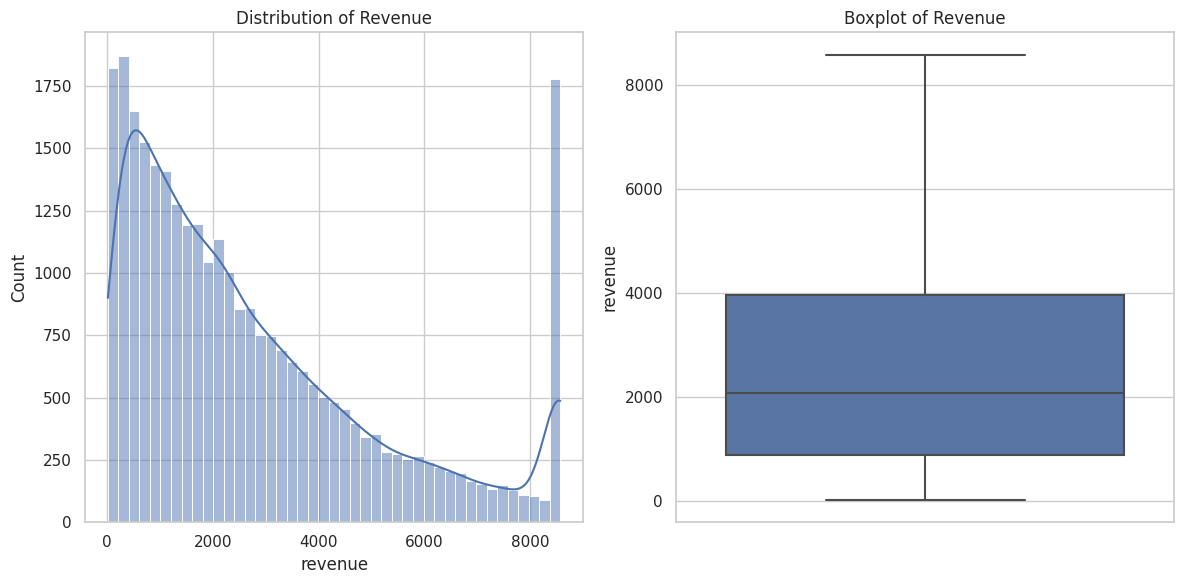

count    29541.000000
mean      2762.328222
std       2387.867402
min         13.000000
25%        880.000000
50%       2070.000000
75%       3958.000000
max       8575.000000
Name: revenue, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('input_data_model_without_lag.csv')

# Extracting the 'revenue' column
revenue = df['revenue']

# Summary statistics of the 'revenue' column
summary_stats_revenue = revenue.describe()

# Visualizations for the 'revenue' column
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(revenue, kde=True)
plt.title('Distribution of Revenue')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=revenue)
plt.title('Boxplot of Revenue')

plt.tight_layout()
plt.show()

# Print summary statistics
print(summary_stats_revenue)


In [ ]:
from scipy.optimize import linprog

# Coefficients of the regression equation
coefficients = [-1321.6, 270.6, 113.0, 385.0, -482.4, 140.3, 3315.1, -0.0350,
                1.9543, 7.8075, -3.1037, 17.2615, 13.7430, 0.5187,
                -0.0729, 228.6, -464.5, 0.000197, 0.000339]

features = [
    "Bathrooms", "Bedrooms", "Listing_Type_Entire_home_apt", "Listing_Type_Shared_room",
    "Max_Guests_lagged", "Property_Type_Treehouse", "booked_days_period_city_lagged",
    "prev_Nightly_Rate", "prev_available_days", "prev_available_days_aveListedPri",
    "prev_booked_days", "prev_booked_days_avePrice", "prev_numReserv_pastYear",
    "prev_numReservedDays_pastYear", "quarter_Q3", "quarter_Q4",
    "revenue_period_city_lagged", "revenue_period_tract"
]


# Constraints:
# Assuming upper and lower bounds for some variables based on typical property listings
# For binary variables, the bounds are 0 and 1
bounds = [(1, 10),    # Bathrooms
          (1, 10),    # Bedrooms
          (0, 1),     # Listing_Type_Entire_home_apt
          (0, 1),     # Listing_Type_Shared_room
          (1, 20),    # Max_Guests_lagged
          (0, 1),     # Property_Type_Treehouse
          (0, 365),   # booked_days_period_city_lagged
          (10, 500),  # prev_Nightly_Rate
          (0, 365),   # prev_available_days
          (0, 10000), # prev_available_days_aveListedPri
          (0, 365),   # prev_booked_days
          (10, 500),  # prev_booked_days_avePrice
          (0, 100),   # prev_numReserv_pastYear
          (0, 365),   # prev_numReservedDays_pastYear
          (0, 1),     # quarter_Q3
          (0, 1),     # quarter_Q4
          (0, 1000000), # revenue_period_city_lagged
          (0, 1000000), # revenue_period_tract
          (0, 1)]      # An additional pair for the constant term in the equation

# Since scipy.optimize minimizes, and we want to maximize, we multiply coefficients by -1
neg_coefficients = [-c for c in coefficients]

# Perform the linear programming optimization
res = linprog(c=neg_coefficients, bounds=bounds, method='highs')

# Extract the optimized values
optimized_values = res.x
optimized_feature_values = dict(zip(features, optimized_values))

optimized_values
optimized_feature_values

{'Bathrooms': 1.0,
 'Bedrooms': 10.0,
 'Listing_Type_Entire_home_apt': 1.0,
 'Listing_Type_Shared_room': 1.0,
 'Max_Guests_lagged': 1.0,
 'Property_Type_Treehouse': 1.0,
 'booked_days_period_city_lagged': 365.0,
 'prev_Nightly_Rate': 10.0,
 'prev_available_days': 365.0,
 'prev_available_days_aveListedPri': 10000.0,
 'prev_booked_days': 0.0,
 'prev_booked_days_avePrice': 500.0,
 'prev_numReserv_pastYear': 100.0,
 'prev_numReservedDays_pastYear': 365.0,
 'quarter_Q3': 0.0,
 'quarter_Q4': 1.0,
 'revenue_period_city_lagged': 0.0,
 'revenue_period_tract': 1000000.0}

In [ ]:
# Preprocess your data (assuming the dataset is already cleaned and encoded)
X = df.drop('booked_days_avePrice', axis=1)  # Replace 'revenue' with your actual revenue column name
y = df['booked_days_avePrice']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Making predictions with the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Calculate metrics for Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Model - MSE: {mse_gb}, MAE: {mae_gb}, R2 Score: {r2_gb}')


Gradient Boosting Model - MSE: 218.76245133426363, MAE: 8.54786743301061, R2 Score: 0.8384491514002207


In [ ]:
# Extracting feature importances
feature_importances_gb = pd.Series(gb_model.feature_importances_, index=X.columns)

# Sorting the feature importances in descending order
sorted_importances_gb = feature_importances_gb.sort_values(ascending=False)

# Displaying the top 10 important features
print(sorted_importances_gb.head(20))

available_days_aveListedPrice    0.931494
Nightly Rate                     0.023944
revenue                          0.015877
booked_days                      0.008033
Bedrooms                         0.002104
Max Guests                       0.002024
Bathrooms                        0.001722
tract_unique_prices              0.001477
num_5_star_Rev_pastYear          0.001233
occupancy_rate                   0.001003
tract_superhosts_ratio           0.000962
Property Type_Apartment          0.000958
numReserv_pastYear               0.000917
Number of Reviews                0.000895
numReviews_pastYear              0.000818
tractQuartilePrice_variance      0.000697
tract_black_perc                 0.000599
Cleaning Fee (USD)               0.000586
booked_days_period_city          0.000513
numReservedDays_pastYear         0.000497
dtype: float64
